<a href="https://colab.research.google.com/github/saikat0pramanik/OIBSIP/blob/main/Task_3_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data Inspection:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.

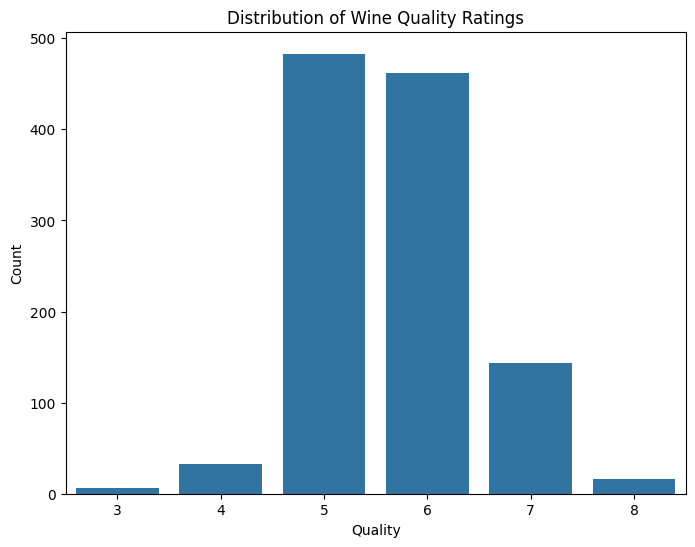

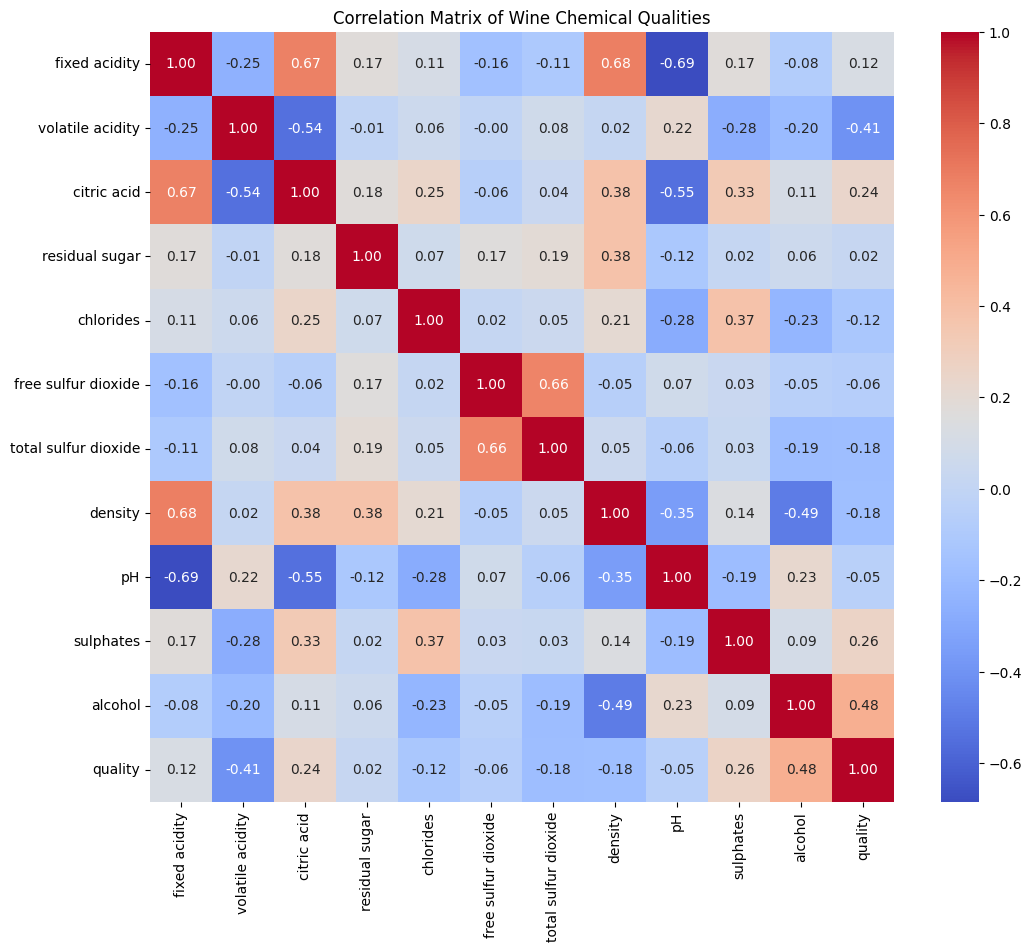

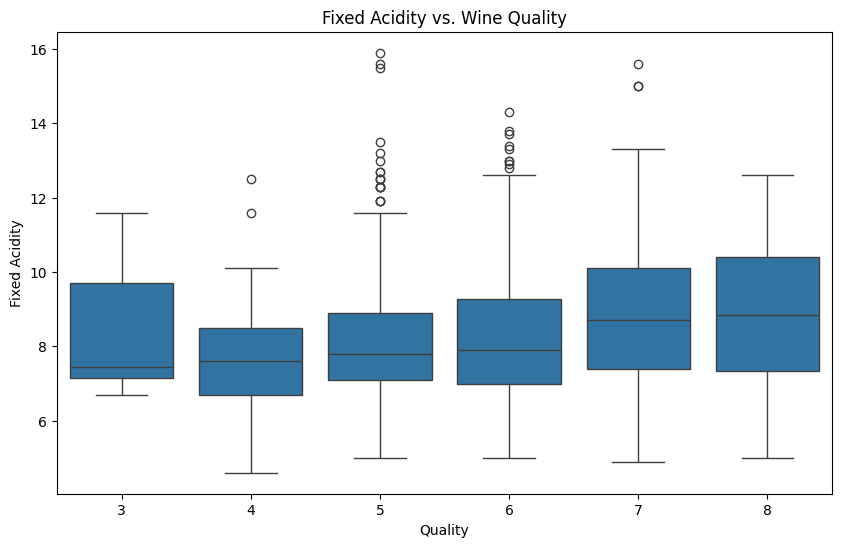

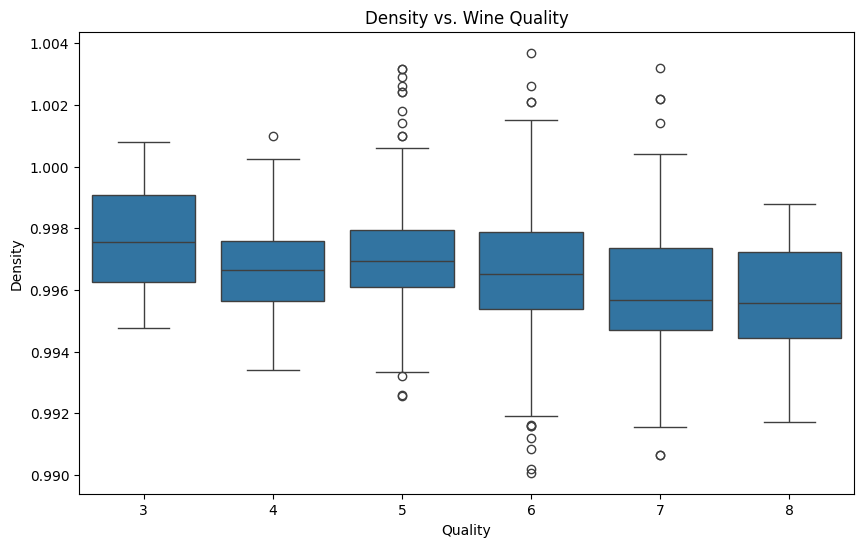


Training and Testing data shapes:
X_train shape: (914, 11)
X_test shape: (229, 11)
y_train shape: (914,)
y_test shape: (229,)

Random Forest Classifier:
Accuracy: 0.7031
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229


Stochastic Gradient Descent Classifier:
Accuracy: 0.4585
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.46      0.98      0.63        96
           6       0.56      0.05      0.09        99
           7       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Data Loading and Initial Analysis
# Load the dataset
df = pd.read_csv('/content/WineQT.csv')

# Display the first few rows and check data types
print("Initial Data Inspection:")
print(df.head())
print("\nData Info:")
print(df.info())

# 2. Data Cleaning and Preprocessing
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop the 'Id' column as it's not a predictor
df = df.drop('Id', axis=1)

# 3. Data Visualization
# Visualize the distribution of the target variable 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix of chemical qualities
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Chemical Qualities')
plt.show()

# Let's visualize the relationship between density, acidity and quality
# Fixed Acidity vs. Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed acidity', data=df)
plt.title('Fixed Acidity vs. Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

# Density vs. Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='density', data=df)
plt.title('Density vs. Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()

# 4. Model Building and Evaluation
# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining and Testing data shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Random Forest Classifier
print("\nRandom Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Stochastic Gradient Descent (SGD) Classifier
print("\nStochastic Gradient Descent Classifier:")
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_sgd))

# Support Vector Classifier (SVC)
print("\nSupport Vector Classifier:")
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))